1.	The MaxCut class was removed from the original repo OpenQuantumComputing/QAOA.
Solution: Forked the repo, cloned the forked repo and re-added the removed maxcut_problem.py file in the problems folder. From maxcut_problem.py imported MaxCut in the ___init__.py file in the problems folder (line 9). 

In [ ]:
#git clone https://github.com/your-username/QAOA.git

# Install your local package in editable mode 
#!pip install -e .

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'QAOA'

In [6]:
from qaoa import QAOA, problems, mixers, initialstates

In [15]:
import numpy as np
import matplotlib 
import networkx as nx

from plotroutines import *

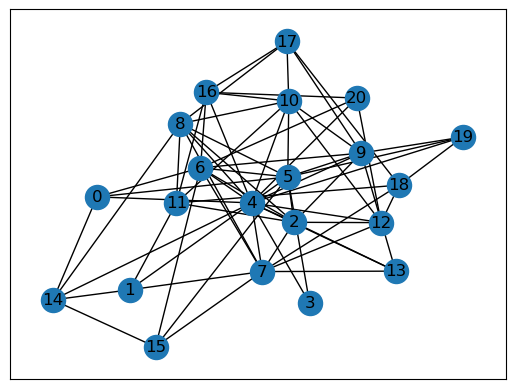

In [3]:
G=nx.read_gml("QAOA/examples/MaxCut/data/w_ba_n21_k4_0.gml") #retrieving the information about the graph (nodes, edges) from a file named w_ba_n21_k4_0.gml
nx.draw_networkx(G) #drawing the graph

In [4]:
mincost = -25.23404480588015  #precalculated minimum cost value. Will be used to compare for approximation ratio later.

In [ ]:
#initializing vanilla QAOA with initial state, problem and mixer
#sampler, optimizer, reps are not defined as their default option is used. Sampler=COBYLA()
qaoa= QAOA(
    initialstate = initialstates.Plus(), #initial trial state= |+>
    problem = problems.MaxCut(G=G), #H_c *****************************************************************************************
    mixer = mixers.X() #H_m=sum of X_i operators
)

#initializing QAOA using CVaR with initial state, problem and mixer and cvar
qaoa_CVaR= QAOA(
    initialstate = initialstates.Plus(), #initial trial state= |+>
    problem = problems.MaxCut(G=G), #H_c
    mixer = mixers.X(), #H_m=sum of X_i operators
    cvar = 0.1 #
)

In [8]:
#Parametric sweep where no. of layers is varied from 0 to maxdepth (max no. of layers)

maxdepth = 10 
qaoa.optimize(depth=maxdepth)
qaoa_CVaR.optimize(depth=maxdepth)


2025-05-09 11:27:56 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2025-05-09 11:27:59 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2025-05-09 11:27:59 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2025-05-09 11:27:59 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2025-05-09 11:30:19 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2025-05-09 11:30:19 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape
2025-05-09 11:30:32 [info     ] cost(depth 1 = -22.99016768921139 file=qaoa.qaoa func=optimize
2025-05-09 11:31:04 [info     ] cost(depth 2 = -23.83060456605892 file=qaoa.qaoa func=optimize
2025-05-09 11:32:05 [info     ] cost(depth 3 = -24.237993170157424 file=qaoa.qaoa func=optimize
2025-05-09 11:33:30 [info     ] cost(depth 4 = -24.46930046337984

NameError: name 'qaoa_CVaR' is not defined

NameError: name 'qaoa_CVaR' is not defined

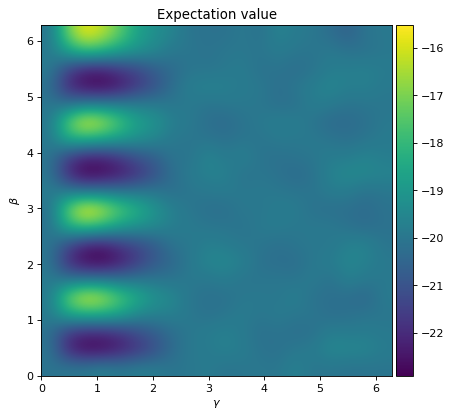

In [9]:
#Plotting the figure of energy landscapes wrt beta and gamma for p=1 
#Note: in the output above, energy landscape for p=1 is calculated by default, therefore defining p is not required.

#(function) def plot_E(
#def plot_E(qaoa_instance, fig=None):
#    angles = qaoa_instance.landscape_p1_angles
#    dgamma = (qaoa_instance.gamma_grid[1]-qaoa_instance.gamma_grid[0])/2
#    dbeta = (qaoa_instance.gamma_grid[1]-qaoa_instance.gamma_grid[0])/2
#    extent = [
#        angles["gamma"][0]-dgamma,
#        angles["gamma"][1]+dgamma,
#        angles["beta"][0]-dbeta,
#        angles["beta"][1]+dbeta,
#    ]
#    return __plot_landscape(qaoa_instance.exp_landscape(), extent, fig=fig)
#This function is in OpenQuantumComputing/QAS2024 repository

plot_E(qaoa)
plot_E(qaoa_CVaR)

NameError: name 'qaoa_CVaR' is not defined

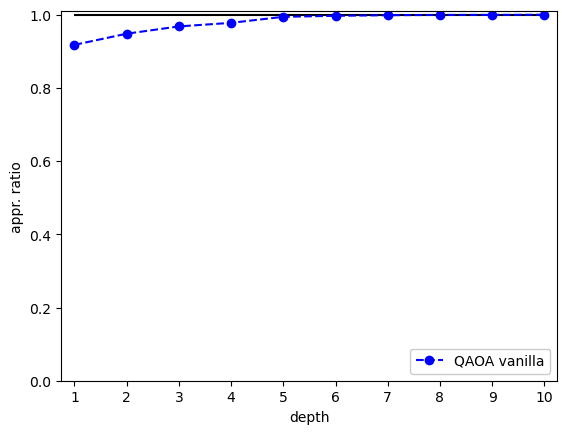

In [17]:
#Plotting Approximation Ratio

#(function) def plot_ApproximationRatio(
#    qaoa_instance: Any,
#    maxdepth: Any,
#    mincost: Any,
#    maxcost: Any,
#    label: Any,
#    style: str = "",
#    fig: Any | None = None,
#    shots: Any | None = None
#) -> None
#This function is in OpenQuantumComputing/QAS2024 repository

fig= plt.figure()

plot_ApproximationRatio(
    qaoa,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA vanilla",
    style="o--b",
    fig=fig
)

plot_ApproximationRatio(
    qaoa_CVaR,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA CVaR",
    style="x--k",
    fig=fig
)